In [29]:
import matplotlib.pyplot as plt
import pandas as pd

**Load the Iris dataset from the package**

In [30]:
from sklearn.datasets import load_iris
import pandas as pd


iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

**Perform basic exploratory data analysis (EDA) to understand the dataset.**

In [31]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
df.shape

(150, 5)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [34]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Figure size 1000x600 with 0 Axes>

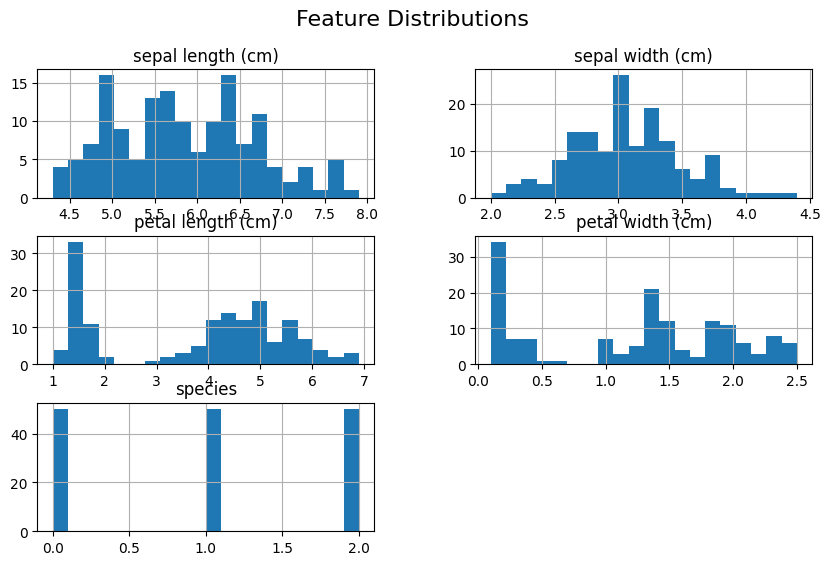

In [35]:
plt.figure(figsize=(10, 6))
df.hist(figsize=(10, 6), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

**Split the data into training and testing sets.**

In [36]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Build and Evaluate a Random Forest Classifier using Iris dataset**

**Build a Random Forest classifier to predict the species of an Iris flower based on its sepal and petal measurements**

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_pred = rf.predict(X_test)

**Evaluate the model using confusion matrix**

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [43]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Interpretation :
* The model achieves perfect accuracy, but there is a possibility of overfitting. Evaluating it on a larger, unseen dataset would help verify its real-world reliability